This Notebook is mostly for exploring the hdf5 datasets to get stats about them such as distribution of tokens lengths for URLs and html_content

In [3]:
import h5py
from transformers import DistilBertTokenizer
import matplotlib.pyplot as plt
from tqdm import tqdm

tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

# Path to the h5py file
file_path = '/Users/imack/transfer/phishing_output_tokenized.h5'

with h5py.File(file_path, 'r') as h5_file:
    html_content_dataset = h5_file['dev/html_content_dataset']
    
    token_lengths = []
    
    for idx in tqdm(range(len(html_content_dataset)), desc=f'Tokenizing', unit='entry'):
        content = html_content_dataset[idx]
        token_lengths.append(len(tokenizer.tokenize(str(content.decode('utf-8')))))


Tokenizing: 100%|██████████| 7126/7126 [27:44<00:00,  4.28entry/s]  


In [5]:
from bs4 import BeautifulSoup
from transformers import RobertaTokenizer, RobertaModel
import h5py
from transformers import DistilBertTokenizer
from custom_html_parser import CustomHTML2Text
file_path = '/Users/imack/transfer/phishing_output_tokenized.h5'
# Load the tokenizer and model

tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

with h5py.File(file_path, 'r') as h5_file:
    html_content_dataset = h5_file['dev/html_content_dataset']

    html_content = str(html_content_dataset[1000].decode('utf-8'))
    
    converter = CustomHTML2Text()
    converter.ignore_links = False  # Preserve links
    plain_text = converter.handle(html_content)
        
    #soup = BeautifulSoup(html_content, "html.parser")

    #for tag in soup(["script", "style", "svg"]):
    #    tag.decompose()  # Completely removes the tag and its content
    #for div in soup.find_all(["div", "span"]):
    #    div.unwrap()
    #html_content = soup.prettify()
    
    tokenized = tokenizer.tokenize(plain_text)

    print(plain_text)
    print(len(tokenized))
    print(tokenized[:512])


Title: My Blog
Meta charset utf-8
Meta content width=device-width, initial-scale=1 name viewport
Meta content noindex, nofollow name robots
Meta content WordPress 6.6.1 name generator
Meta content https://usps.aufastshipping.com/wp-content/uploads/2024/05/cropped-13tunxy72vpziyuve3yihum0gz4c-270x270.png name msapplication-TileImage
Meta content https://usps.aufastshipping.com/ property og:url
Meta content My Blog property og:site_name
Meta content Home property og:title
Meta content website property og:type
Link fonts.googleapis.com dns-prefetch
Link usps.aufastshipping.com alternate
Link fonts.gstatic.com preconnect

Skip to main content  Skip to footer

__ Find UPS Closest Location

  * __

  * __ [ Service Alert  ](https://www.ups.com/us/en/service-alerts.page)

* United States - English 

  * [ United State - English ](https://www.ups.com/us/en/Home.page?loc=en_US)
  * [ Estados Unidos - Español ](https://es-us.ups.com/us/es/Home.page?loc=es_US)
  *   * [ Select Another Country or 

49145.29848442324
45335.18725379854


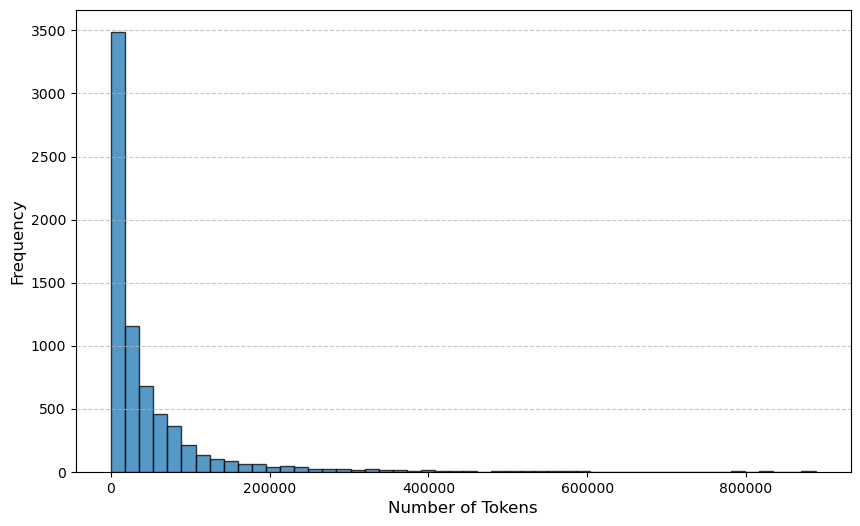

In [4]:
import numpy as np
print(sum(token_lengths)/len(token_lengths))
token_lengths_np = np.array(token_lengths)
filtered_lengths = token_lengths_np[token_lengths_np <= 1000_000]
print(sum(filtered_lengths)/len(filtered_lengths))

plt.figure(figsize=(10, 6))
plt.hist(filtered_lengths, bins=50, alpha=0.75, edgecolor='black')
plt.xlabel("Number of Tokens", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()